<p style='text-align:center; font-weight:bold'>Predicting Car Prices</p>

<h4 style='text-align:center'>
    Hypothetical Case Scenerio
</h4>
<p>
    Ahmed is a Data Scientist. The current COVID crisis on the taken a toll on Ahmed's finances and Ahmed is currently looking for ways to augument his income. Ahmed a owns Toyota Sedan his father gave him as a graduating gift from college. Ahmed has decided to sell his car to get extra income.  
</p>

<p style='font-weight:bold; text-align:center'>Data Analysis Methodology</p>
Since this project is mainly concerned about the underlying mathematics, the data clean and preprocessing, Exploratory data analysis has been seperated into a seperate notebook here. check it out if you're interested in the process the led up to the current conclusions. Basic descriptive statistics for the features with continous variables was taken. A Scatter plot was used to examine the strength and direction of the correlation between the each feature as a potential independent variable and the pearson correlation and p.value was taken to validate the results of visualing inspecting the scatter plots.

Basic descriptive stats of the features with categorical variables was taken and visualised using a box plot and the various distribution of car prices within the different groups examined. Analysis of variance test was performed and the F-test score i.e (variation betwen the sample group means divided by the variation within the sample group) and the p-value(i.e confidence degree/statistical significance) was taken 


On analysing the data, the features below have shown the have an impact on the prices of car. So we will feeding our model with these features. 
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway mpg (converted to kilometres)</li>
    <li>Wheel-base</li>
    <li>Bore</li>
    <li>Drive-wheels (encoded and labelled as 4wd, rwd, fwd)</li>
</ul>
<h3 style='text-align:center'>Problem Statement</h3>
<p>Ahmed has been able to lay hands on the owner's manual of his car and historical data on car prices sold in his region over the years. From historical precedence, what is ideal amoout Ahmed should sell his car? Ahmed has decided he needs a certain amount of money and would not sell his car below that amount. Has price Ahmed fixed for his a fair? Ahme dis tryiing sell his car at the optimum amount to gain the most profit from the sale</p>

In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = '/home/arah/Documents/MFC_Linear-Algebra/clean_auto.csv'
tf = pd.read_csv(path)

In [65]:
#extracting only the features we need from the data
df = tf[['length', 'width', 'curb-weight', 'engine-size', 'horsepower',  'highway-mpg', 'wheel-base', 'bore', '4wd', 'rwd', 'fwd', 'price']]

<h4>Using Multiple Linear Regression</h4>
<p>Linear regressions help us infer linear relationships between variables. The allow us to ask how one or more
independent variables can be used to linearly explain or predict a dependent variable.(Arun, 2020). Linear regression explains the linear relationship between the independent variable(s) and the dependent variable</p>
<p>Given the set independent variables, $[length, width, curb.weight, engine.size, horsepower,  highway.mpg, wheel.base, bore, 4wd, rwd, fwd]$ the linear  regression model explians the linear relationship between each independent variable and the price </p>
$$
Price = x_0 + x_1length + x_2width + x_3curb.weight + x_4engine.size + x_5horsepower + x_6highway/km...
$$
<p>where $x_0$ is the intercept and and $x_1 ...$ is the coefficients for the respective independent variables</p>

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse


lr=LinearRegression()
y_data = df['price']
x_data=df.drop('price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)
lr.fit(x_train, y_train)
yhat_train = lr.predict(x_train)
yhat_test = lr.predict(x_test)

<h3>Mathematical Intuition Behind Linear Regression</h3>


And in this case of Ahmed's model, the coefficients for the repspective independent variable

In [67]:
lr.coef_

array([ 5.39764575e+03,  5.64896691e+04, -1.29593740e+00,  9.65811167e+01,
        3.61009863e+01,  2.73498603e+02, -4.08300930e+01, -1.12842533e+03,
       -3.57677541e+02,  1.81362871e+03, -1.45595117e+03])

and the intercept for the equation


In [68]:
lr.intercept_

-49571.46648071201

<p>Ahmed  splits the data into training and testing sets. This is important to understand how to the linear regression model will on perform on out of sample data the that reflects the real world scenario. Using the testing set to evaluate how his linear regression model perfor,ms</p>

In [69]:
def dist_plot(x:any, y:any, title:str):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(x, hist=False, color="r", label="Actual Value")
    sns.distplot(y, hist=False, color="b", label="Predicted Values" , ax=ax1)
    plt.title(title)
    plt.xlabel('Price')
    plt.ylabel(title)
    plt.show()
    plt.close()

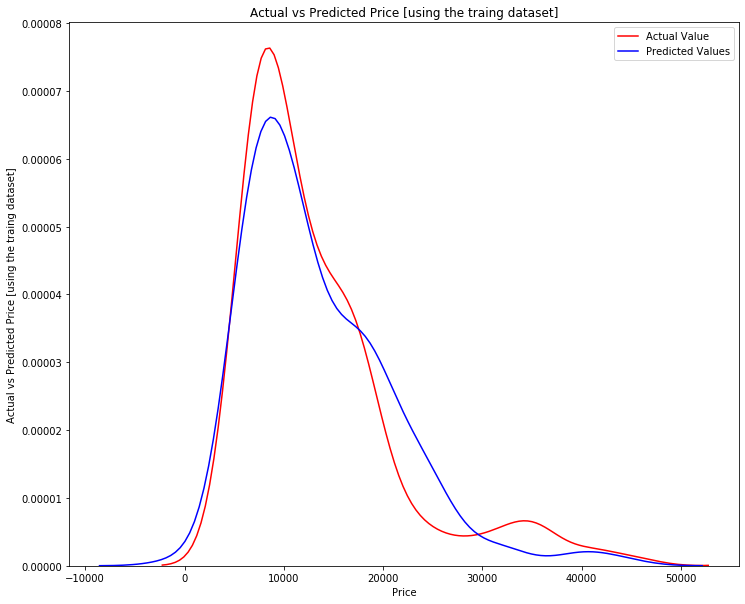

In [70]:
dist_plot(y_train, yhat_train, 'Actual vs Predicted Price [using the traing dataset]')

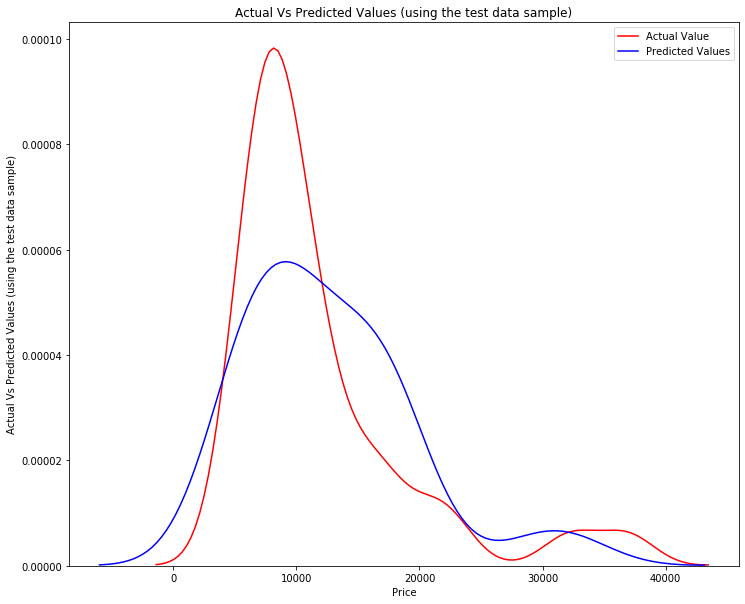

In [71]:
dist_plot(y_test, yhat_test, 'Actual Vs Predicted Values (using the test data sample)')

In [72]:
lr.score(x_train, y_train)

0.8305697991242403

In [47]:
mse(y_train)

10858858.426118813

In [48]:
lr.intercept_

-49571.46648071201